In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
%pwd

'C:\\pandas_practice\\Pandas Analysis'

In [7]:
pre_sale = pd.read_csv("recent_price.csv", encoding='euc-kr')
pre_sale.shape

(3060, 5)

In [8]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전용면적 60㎡이하,2015,10,5652
1,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
2,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
3,서울,전용면적 102㎡초과,2015,10,5879
4,인천,전용면적 60㎡이하,2015,10,3488


In [9]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
3055,경남,전용면적 102㎡초과,2019,6,4303
3056,제주,전용면적 60㎡이하,2019,6,3804
3057,제주,전용면적 60㎡초과 85㎡이하,2019,6,3791
3058,제주,전용면적 85㎡초과 102㎡이하,2019,6,3226
3059,제주,전용면적 102㎡초과,2019,6,3269


In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 5 columns):
지역명        3060 non-null object
규모구분       3060 non-null object
연도         3060 non-null int64
월          3060 non-null int64
분양가격(㎡)    2841 non-null object
dtypes: int64(2), object(3)
memory usage: 119.6+ KB


In [11]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [12]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    219
dtype: int64

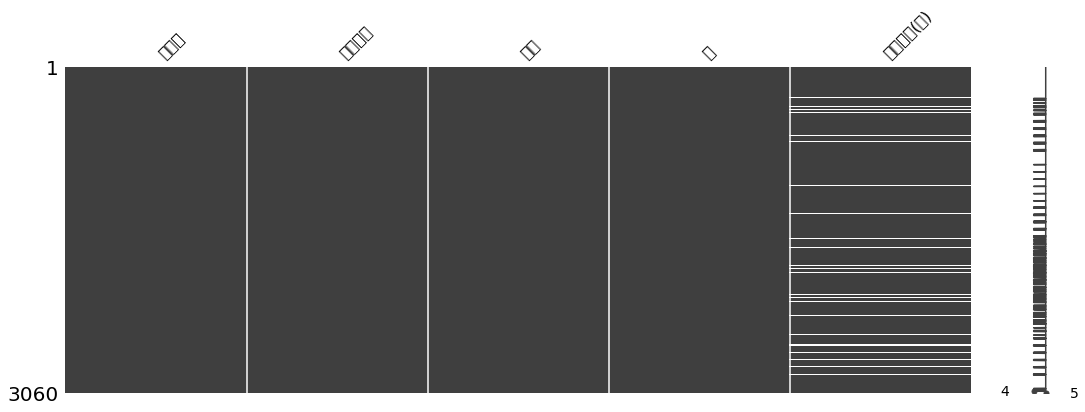

In [16]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [17]:
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [18]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [19]:
# 분양가격의 타입을 숫자로 변경해준다
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구하자
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [20]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 7 columns):
지역명        3060 non-null object
규모구분       3060 non-null object
연도         3060 non-null object
월          3060 non-null object
분양가격(㎡)    2841 non-null object
분양가격       2758 non-null float64
평당분양가격     2758 non-null float64
dtypes: float64(2), object(5)
memory usage: 167.4+ KB


In [21]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [22]:
# 결측치 확인
pre_sale.isnull().sum()
# 공백을 인식하였으나 수치로 변환할떄 null로 집계됨

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    219
분양가격       302
평당분양가격     302
dtype: int64

In [23]:
pre_sale.describe()

,분양가격,평당분양가격
count,2758.000000,2758.000000
mean,3193.791878,10539.513198
std,1194.148522,3940.690123
min,1868.000000,6164.400000
25%,2432.250000,8026.425000
50%,2840.500000,9373.650000
75%,3478.000000,11477.400000
max,12728.000000,42002.400000


In [27]:
pre_sale.describe(include=[np.object])
# 월과 가격도 object 형태로 바꿨기때문에 확인가능함

,지역명,규모구분,연도,월,분양가격(㎡)
count,3060,3060,3060,3060,2841
unique,17,4,5,12,1293
top,부산,전용면적 60㎡초과 85㎡이하,2017,3,2221
freq,180,765,816,272,16


In [29]:
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']  # object 타입이므로 '' 붙여줌ㅋ
pre_sale_2017.shape

(816, 7)

In [30]:
pre_sale['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     765
전용면적 102㎡초과          765
전용면적 60㎡이하           765
전용면적 85㎡초과 102㎡이하    765
Name: 규모구분, dtype: int64

In [31]:
pre_sale['지역명'].value_counts()

부산    180
전남    180
서울    180
대전    180
세종    180
대구    180
경북    180
인천    180
전북    180
경남    180
울산    180
충남    180
경기    180
강원    180
충북    180
제주    180
광주    180
Name: 지역명, dtype: int64

### groupby 와 pivot_table 활용하기

In [36]:
pd.options.display.float_format = '{:,.0f}'.format
# describe는 수치형을 기본으로 표현함 : 분양가격과 평당분양가격만 수치형 데이터임
pre_sale.groupby(pre_sale['연도']).describe().T  # describe를 Tranpose해서 보기

연도             2015   2016   2017   2018   2019
분양가격   count    192    780    712    716    358
       mean   2,814  2,965  3,176  3,353  3,613
       std      990  1,092  1,125  1,211  1,418
       min    1,868  1,900  1,983  2,076  2,149
       25%    2,252  2,312  2,383  2,593  2,657
       50%    2,557  2,672  2,855  2,946  3,226
       75%    3,003  3,153  3,470  3,705  4,066
       max    7,092  8,096  7,887  8,098 12,728
평당분양가격 count    192    780    712    716    358
       mean   9,285  9,785 10,481 11,065 11,922
       std    3,267  3,603  3,712  3,996  4,680
       min    6,164  6,270  6,544  6,851  7,092
       25%    7,433  7,629  7,863  8,556  8,768
       50%    8,438  8,818  9,422  9,722 10,646
       75%    9,909 10,406 11,450 12,226 13,416
       max   23,404 26,717 26,027 26,723 42,002

In [37]:
pre_sale.groupby(pre_sale['연도']).describe()

분양가격                                            평당분양가격               \
     count  mean   std   min   25%   50%   75%    max  count   mean   std   
연도                                                                          
2015   192 2,814   990 1,868 2,252 2,557 3,003  7,092    192  9,285 3,267   
2016   780 2,965 1,092 1,900 2,312 2,672 3,153  8,096    780  9,785 3,603   
2017   712 3,176 1,125 1,983 2,383 2,855 3,470  7,887    712 10,481 3,712   
2018   716 3,353 1,211 2,076 2,593 2,946 3,705  8,098    716 11,065 3,996   
2019   358 3,613 1,418 2,149 2,657 3,226 4,066 12,728    358 11,922 4,680   

                                       
       min   25%    50%    75%    max  
연도                                     
2015 6,164 7,433  8,438  9,909 23,404  
2016 6,270 7,629  8,818 10,406 26,717  
2017 6,544 7,863  9,422 11,450 26,027  
2018 6,851 8,556  9,722 12,226 26,723  
2019 7,092 8,768 10,646 13,416 42,002

### 규모별 전국 평균 분양가격

In [39]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')  # values, index, columns 순서대로

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","12,879"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,272"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,514"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,033"


### 전국 분양가 변동금액

In [40]:
# 규모구분에서 60m2이하로 되어있는 데이터만 가져온다
region_year_small = pre_sale.loc[pre_sale['규모구분'] == '전용면적 60㎡이하']
# reset_index : 두개의 row로 구분된 테이블에서 구분을 삭제하기 위해서
region_year = region_year_small.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019
0,강원,"7,557","7,044","7,089","7,693","8,366"
1,경기,"10,448","11,744","12,381","14,397","14,490"
2,경남,"7,391","7,991","8,499","9,266","9,549"
3,경북,"7,251","7,213","7,900","8,264","8,181"
4,광주,"7,589","8,354","8,559","9,548","10,614"
5,대구,"9,239","10,930","11,852","12,141","13,221"
6,대전,"8,530","8,736","9,253","8,282","11,002"
7,부산,"9,771","9,916","10,849","12,385","12,587"
8,서울,"20,122","21,744","21,897","23,395","25,896"
9,세종,"8,520","8,878","9,156","10,111","10,111"


In [52]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']) # astype(int) int로 반환
region_year['변동액'].dropna().astype(int)  # nan은 int로 바꿀수 없어서 na 제거한 것만 int화
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print("15년부터 18년까지 변동액이 가장 큰 곳은 경기 : 평당 {:,.0f}원".format(max_delta_price))
print("15년부터 18년까지 변동액이 가장 작은 곳은 대구 : 평당 {:,.0f}원".format(min_delta_price))
print("15년부터 18년까지 평균 변동액 : 평당 {:,.0f}원".format(mean_delta_price))

region_year

15년부터 18년까지 변동액이 가장 큰 곳은 경기 : 평당 3,948,725원
15년부터 18년까지 변동액이 가장 작은 곳은 대구 : 평당 -248,100원
15년부터 18년까지 평균 변동액 : 평당 1,569,440원


연도,지역명,2015,2016,2017,2018,2019,변동액
0,강원,"7,557","7,044","7,089","7,693","8,366",136
1,경기,"10,448","11,744","12,381","14,397","14,490","3,949"
2,경남,"7,391","7,991","8,499","9,266","9,549","1,875"
3,경북,"7,251","7,213","7,900","8,264","8,181","1,013"
4,광주,"7,589","8,354","8,559","9,548","10,614","1,959"
5,대구,"9,239","10,930","11,852","12,141","13,221","2,902"
6,대전,"8,530","8,736","9,253","8,282","11,002",-248
7,부산,"9,771","9,916","10,849","12,385","12,587","2,614"
8,서울,"20,122","21,744","21,897","23,395","25,896","3,273"
9,세종,"8,520","8,878","9,156","10,111","10,111","1,592"


## 연도별 연동 그래프

In [53]:
import seaborn as sns
sns.set_style("whitegrid")

In [54]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

## Seaborn 으로 막대그래프 그리기

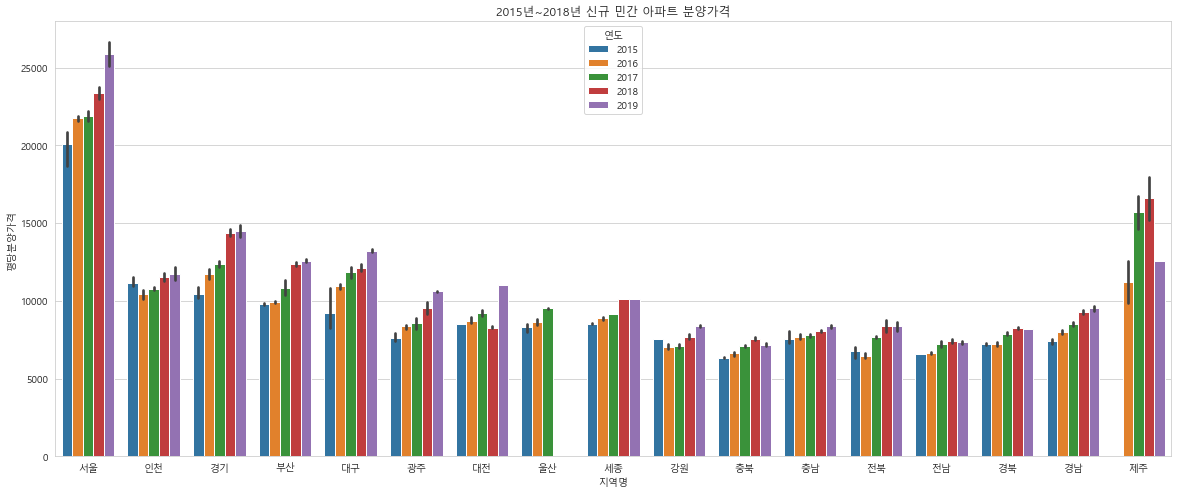

In [55]:
plt.figure(figsize=(20,8))
plt.title('2015년~2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_small, x='지역명', y='평당분양가격', hue='연도')

## Pandas로 막대그래프 그리기

In [56]:
df_year_region = pd.pivot_table(region_year_small, index=['지역명'], columns='연도', values='평당분양가격')
df_year_region

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,"7,557","7,044","7,089","7,693","8,366"
경기,"10,448","11,744","12,381","14,397","14,490"
경남,"7,391","7,991","8,499","9,266","9,549"
경북,"7,251","7,213","7,900","8,264","8,181"
광주,"7,589","8,354","8,559","9,548","10,614"
대구,"9,239","10,930","11,852","12,141","13,221"
대전,"8,530","8,736","9,253","8,282","11,002"
부산,"9,771","9,916","10,849","12,385","12,587"
서울,"20,122","21,744","21,897","23,395","25,896"


In [57]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018', '2019'], dtype='object', name='연도')

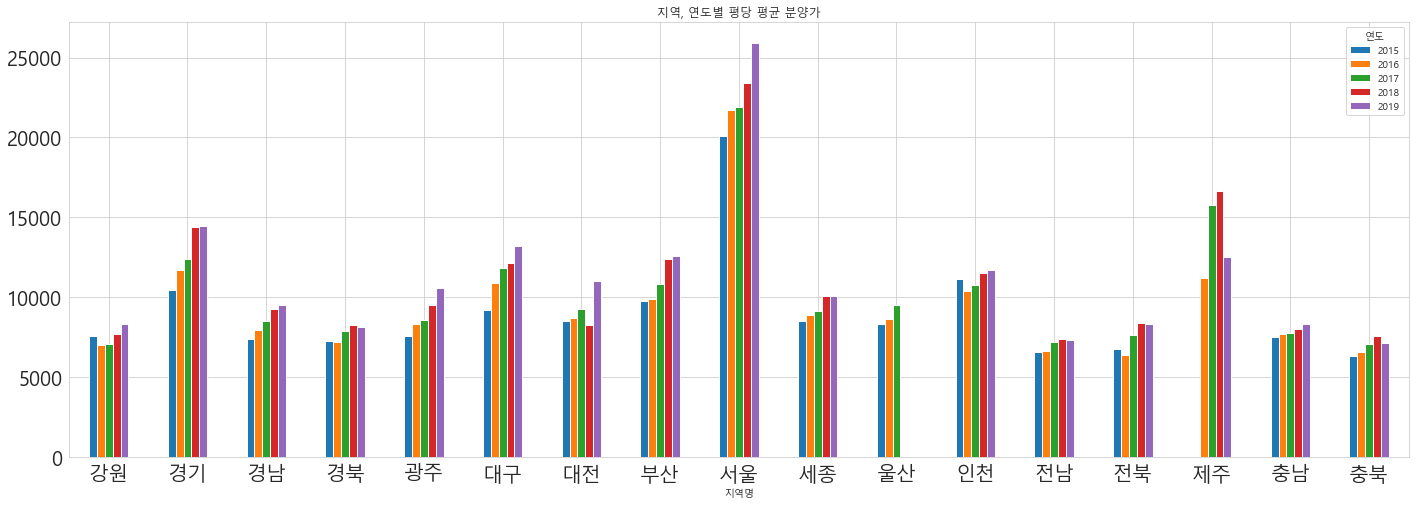

In [69]:
df_year_region.plot.bar(figsize=(24,8), grid=True, fontsize=20, rot=0, title='지역, 연도별 평당 평균 분양가')  # rot=0은 글자 가로로